In [1]:
import numpy as np
import sklearn.datasets
import time
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from tqdm import tqdm


In [97]:
def V_1(X):
    n = X.shape[0]

    X = np.sort(X)
    s = np.std(X)

    tmp_1 = True
    tmp_2 = True

    V_array = np.array([])


    for m in range(1, int(n/2)):

        product = 1


        for i in range(1, n + 1):

            if i - m <= 1:
                X_1 = X[0]
                tmp_1 = False

            if i + m >= n:
                X_2 = X[-1]
                tmp_2 = False


            if tmp_1:
                X_1 = X[i - m - 1]

            if tmp_2:
                X_2 = X[i + m - 1]

            tmp_1 = True
            tmp_2 = True
                
            product *= 1 / (X_2 - X_1)


        V = (2 * np.pi * np.e * s**2)**(n / 2) * (2 * m / n) ** n * product 

        V_array = np.append(V_array, V)


    return V_array

In [127]:
def calculate_inner_product(X, m):
    n = X.shape[0]
    p = 1
    for i in range(n):
        i_plus_m = min(i + m, n - 1)
        i_minus_m = max(i - m, 0)
        p /= (X[i_plus_m] - X[i_minus_m])
    return p * (2 * m / n) ** n

def V_2(X, delta=0.5):
    n = X.shape[0]
    X = np.sort(X)
    s = np.std(X)
    V = np.array([calculate_inner_product(X, m) for m in range(1, int(n ** (1 - delta)))])
    
    return (2 * np.pi * np.e * s**2)**(n / 2) * V
    


In [130]:
def get_c_array(alpha, n_array, N, test=V_1):
    C_array = np.array([])
    for n in tqdm(n_array):
        V_array = np.array([])
        X = np.random.normal(0, 1, size=(N, n))

        for i in range(N):
            V = np.log(np.min(test(X[i])))
            V_array = np.append(V_array, V)


        V_array = np.sort(V_array)
        C = V_array[int(alpha * N) - 2]
        C_array = np.append(C_array, C)

    return C_array

In [131]:
N = 500 # number of samples for monte carlo
n_array = np.arange(5, 100, 5, dtype=int) # sample size
alphas = [0.01, 0.025, 0.05, 0.1, 0.125, 0.15, 0.25, 0.3, 0.4, 0.45]

In [132]:
C_arrays_v1 = [get_c_array(alpha, n_array, N) for alpha in alphas]

100%|██████████| 19/19 [00:09<00:00,  2.02it/s]


In [133]:
C_arrays_v2 = [get_c_array(alpha, n_array, N, test=V_2) for alpha in alphas]

100%|██████████| 19/19 [00:02<00:00,  8.52it/s]


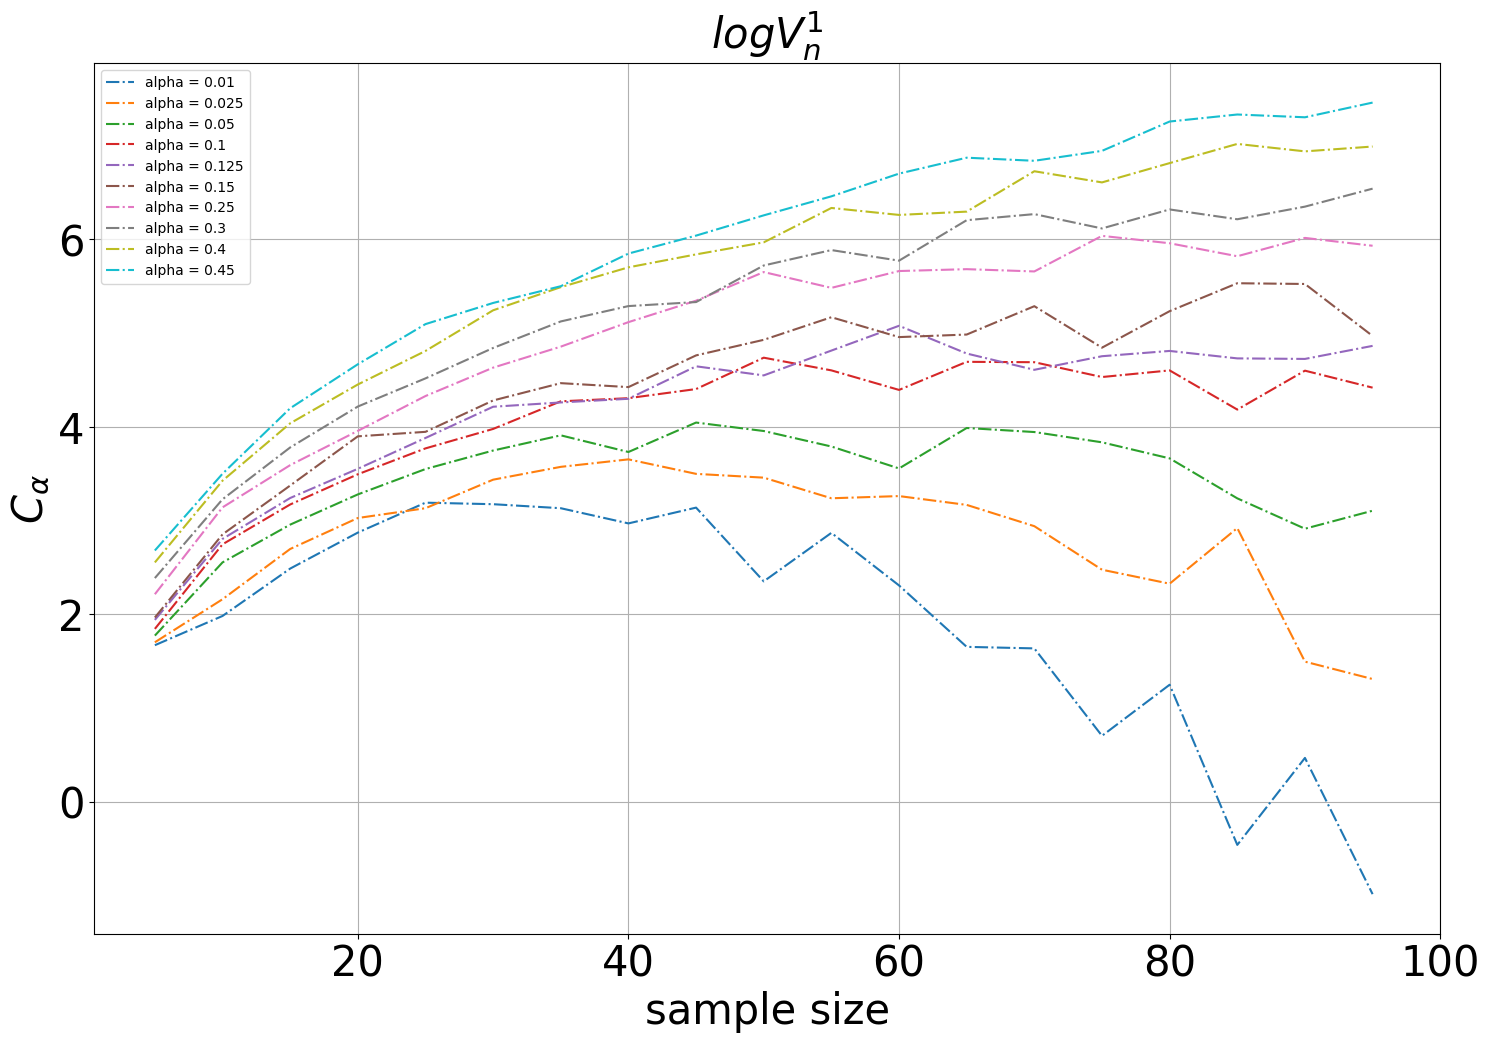

In [134]:
f, ax1 = plt.subplots(1,figsize = (15,10))

# colors = ['black', 'blue'] * 5
# colors[0] = 'red'

for i, C_array in enumerate(C_arrays_v1):
    plt.plot(n_array, C_array, label='alpha = '+str(alphas[i]), ls='dashdot')#, color=colors[i])


ax1.grid(alpha = 1)
ax1.xaxis.set_major_locator(MaxNLocator(integer=False))
ax1.set_xlabel('sample size', fontsize = 30 )
ax1.set_ylabel(r'$C_{\alpha}$', fontsize = 30 )


ax1.legend(fontsize = 10)

ax1.set_xticks(np.arange(20, 101, 20), np.arange(20, 101, 20))
ax1.tick_params(axis='x', labelsize=30)
ax1.tick_params(axis='y', labelsize=30)

plt.tight_layout()

plt.title('$logV_n^1$', fontsize = 30)
plt.show()


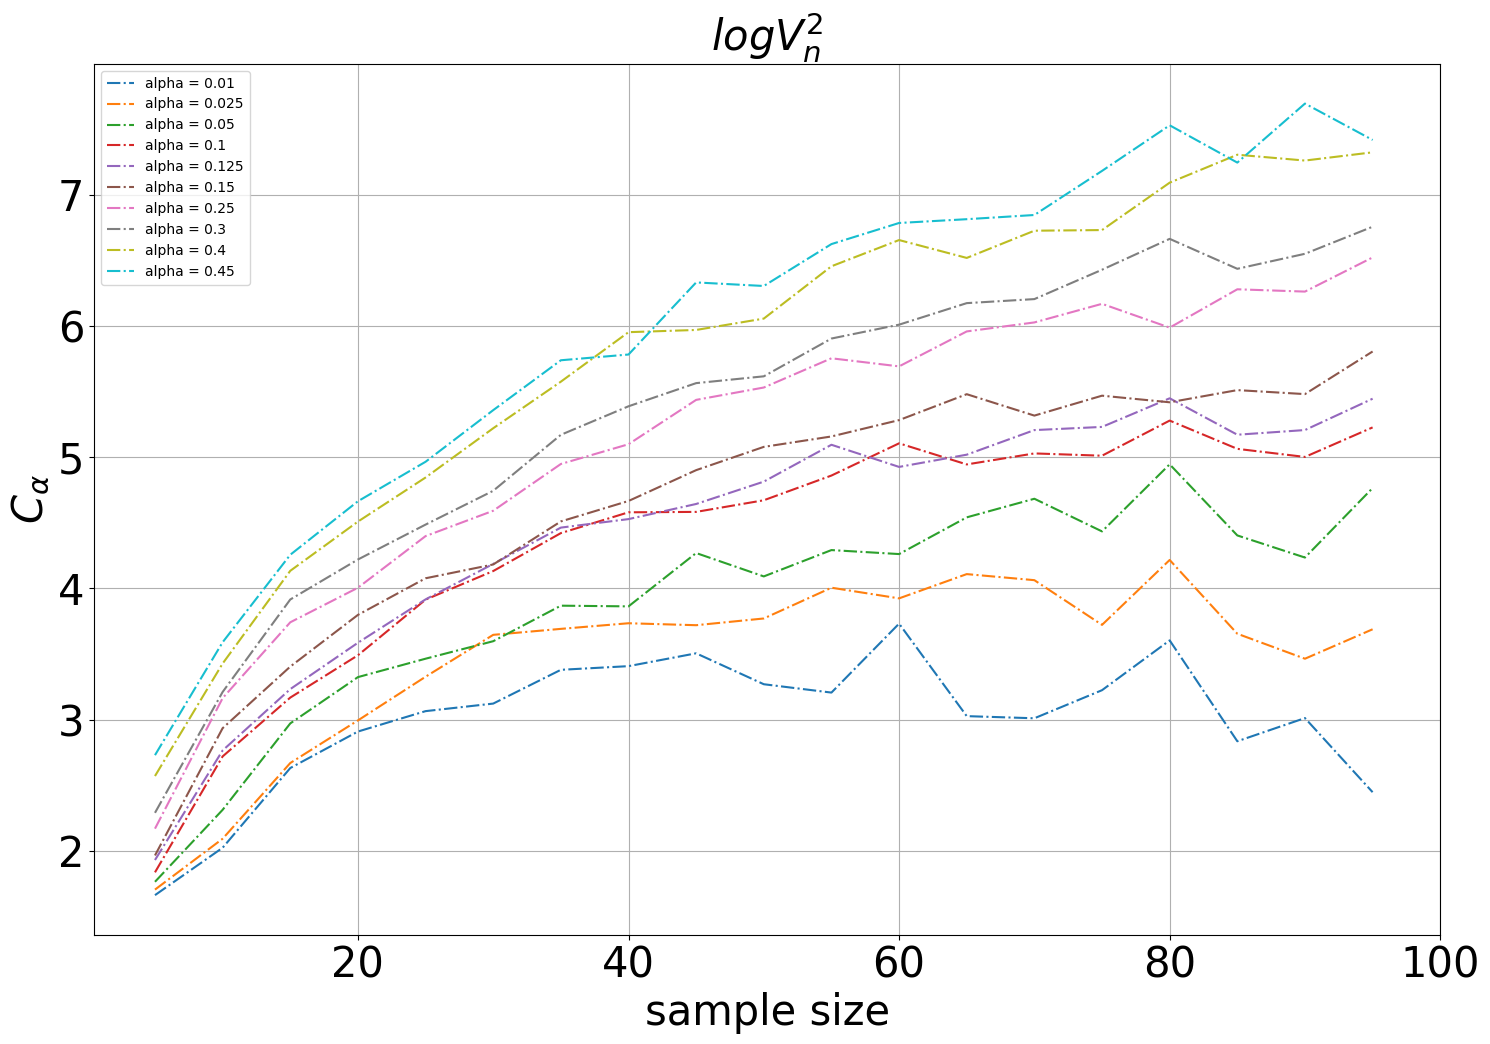

In [136]:
f, ax1 = plt.subplots(1,figsize = (15,10))

# colors = ['black', 'blue'] * 5
# colors[0] = 'red'

for i, C_array in enumerate(C_arrays_v2):
    plt.plot(n_array, C_array, label='alpha = '+str(alphas[i]), ls='dashdot')#, color=colors[i])


ax1.grid(alpha = 1)
ax1.xaxis.set_major_locator(MaxNLocator(integer=False))
ax1.set_xlabel('sample size', fontsize = 30 )
ax1.set_ylabel(r'$C_{\alpha}$', fontsize = 30 )


ax1.legend(fontsize = 10)

ax1.set_xticks(np.arange(20, 101, 20), np.arange(20, 101, 20))
ax1.tick_params(axis='x', labelsize=30)
ax1.tick_params(axis='y', labelsize=30)

plt.tight_layout()

plt.title('$logV_n^2$', fontsize = 30)
plt.show()
